This is to test the function where we add noise to data. 

In [16]:
from utils_parallel_syn_gradient import generate_data_torch
import torch
import matplotlib.pyplot as plt

help(generate_data_torch)

Help on function generate_data_torch in module utils_parallel_syn_gradient:

generate_data_torch(nDimension=10, nSample=100, randomSeed=2, device=device(type='cpu'), distribution: Literal['uniform', 'gaussian'] = 'uniform')
    Create training data for the parallel synapse model trained with gradient descent algorithm
    
    Inputs:
        nDimension: input dimension
        nSample: number of samples
        randomSeed: random seed
        device: cpu or gpu
        distribution: distribution of the data, either "uniform" or "gaussian"
    Outputs:
        data: torch tensor of shape (nSample, nDimension)
            data is sampled from uniform distribution between 0 and 1
        label: torch tensor of shape (nSample, 1)
            label is -1 for the first half of the samples and 1 for the second half



Here we create sample data

In [17]:
n_dimension = 20
n_sample = 100
ramdom_seed = 0
device = torch.device("cpu")
distribution = "uniform"

data, label = generate_data_torch(
    n_dimension, n_sample, ramdom_seed, device, distribution
)
print("n_dimension:", n_dimension)
print("n_sample:", n_sample)
print("ramdom_seed:", ramdom_seed)
print("device:", device)
print("distribution:", distribution)
print("--------------------------------")
print("data:")
print(data)
print("data.shape:")
print(data.shape)
print("label:   ")
print(label)
print("label.shape:")
print(label.shape)

n_dimension: 20
n_sample: 100
ramdom_seed: 0
device: cpu
distribution: uniform
--------------------------------
data:
tensor([[0.4963, 0.7682, 0.0885,  ..., 0.8000, 0.1610, 0.2823],
        [0.6816, 0.9152, 0.3971,  ..., 0.9298, 0.7231, 0.7423],
        [0.5263, 0.2437, 0.5846,  ..., 0.1123, 0.1535, 0.2417],
        ...,
        [0.1123, 0.5086, 0.1838,  ..., 0.3583, 0.3127, 0.8382],
        [0.9601, 0.4789, 0.1475,  ..., 0.9331, 0.4337, 0.2484],
        [0.1158, 0.2062, 0.6444,  ..., 0.5196, 0.3481, 0.8767]])
data.shape:
torch.Size([100, 20])
label:   
tensor([-1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1.,
        -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1.,
        -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1.,
        -1., -1., -1., -1., -1., -1., -1., -1.,  1.,  1.,  1.,  1.,  1.,  1.,
         1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
         1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1

In [18]:
def add_noise(data, label, noise_type="uniform", noise_size=0.1, noise_repeat=5):
    """
    Add noise to the data,
    if uniform noise, noise in U(-noise_size, noise_size)
    if gaussian noise, noise in N(0, noise_size)
    """
    noisy_data_all = []
    label_all = []
    for i in range(noise_repeat):
        if noise_type == "uniform":
            noise = torch.rand_like(data) * noise_size
            noise = noise - 0.5 * noise_size

        elif noise_type == "gaussian":
            noise = torch.randn_like(data) * noise_size
        else:
            raise ValueError("Invalid noise type")
        # Ensure noise is within [0, 1] range by reflecting values outside this range
        noisy_data = data + noise
        noisy_data = torch.where(noisy_data < 0, -noisy_data, noisy_data)
        noisy_data = torch.where(noisy_data > 1, 2 - noisy_data, noisy_data)
        noisy_data_all.append(noisy_data)
        label_all.append(label)
    noisy_data_all = torch.cat(noisy_data_all, dim=0)
    label_all = torch.cat(label_all, dim=0)
    return noisy_data_all, label_all


noisy_data:
tensor([[0.4760, 0.6996, 0.1107,  ..., 0.7511, 0.1254, 0.3560],
        [0.6602, 0.9362, 0.3696,  ..., 0.8710, 0.7227, 0.6811],
        [0.6072, 0.2545, 0.6404,  ..., 0.1177, 0.2497, 0.2744],
        ...,
        [0.1933, 0.4417, 0.2796,  ..., 0.3227, 0.4110, 0.8781],
        [0.9539, 0.4871, 0.1763,  ..., 0.9731, 0.4478, 0.1738],
        [0.1040, 0.1796, 0.5867,  ..., 0.5185, 0.2858, 0.8891]])
noisy_data.shape:
torch.Size([500, 20])


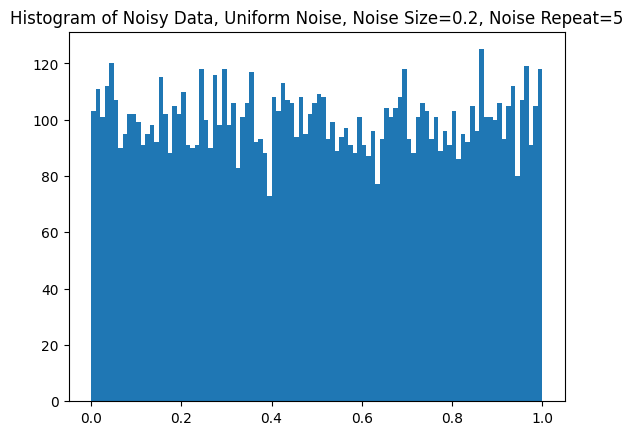

noisy_data:
tensor([[0.5347, 0.6953, 0.1631,  ..., 0.8201, 0.3998, 0.0112],
        [0.7628, 0.9754, 0.6756,  ..., 0.7889, 0.7926, 0.7442],
        [0.8757, 0.1856, 0.2292,  ..., 0.3336, 0.3176, 0.1097],
        ...,
        [0.1251, 0.3220, 0.0355,  ..., 0.3088, 0.1666, 0.5084],
        [0.8436, 0.3856, 0.3607,  ..., 0.7300, 0.4843, 0.4603],
        [0.2890, 0.2963, 0.8346,  ..., 0.6258, 0.3625, 0.9730]])
noisy_data.shape:
torch.Size([500, 20])


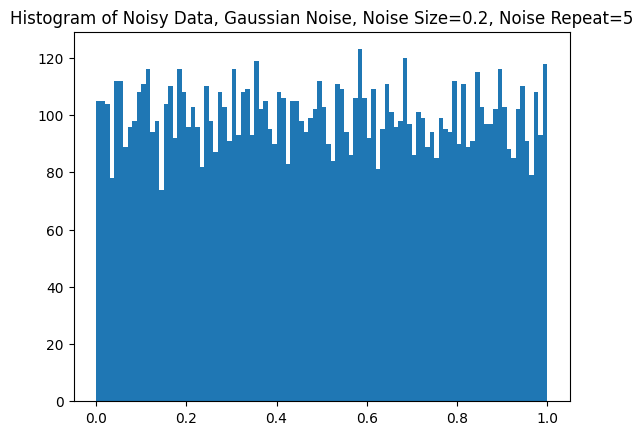

In [21]:
noisy_data = add_noise(
    data, label, noise_type="uniform", noise_size=0.2, noise_repeat=5
)
print("noisy_data:")
print(noisy_data)
print("noisy_data.shape:")
print(noisy_data.shape)

plt.hist(noisy_data.flatten(), bins=100)
plt.title("Histogram of Noisy Data, Uniform Noise, Noise Size=0.2, Noise Repeat=5")
plt.show()

noisy_data = add_noise(
    data, label, noise_type="gaussian", noise_size=0.2, noise_repeat=5
)
print("noisy_data:")
print(noisy_data)
print("noisy_data.shape:")
print(noisy_data.shape)

plt.hist(noisy_data.flatten(), bins=100)
plt.title("Histogram of Noisy Data, Gaussian Noise, Noise Size=0.2, Noise Repeat=5")
plt.show()
